In [ ]:
# EXPERIMENT-2
#  Single Neuron Implementation for AND Gate using Perceptron

import numpy as np

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron Model Class
class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.lr = lr
        self.epochs = epochs

    def predict(self, x):
        z = np.dot(x, self.weights[1:]) + self.weights[0]  # weighted sum + bias
        return step_function(z)

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                self.weights[1:] += self.lr * (y[i] - prediction) * X[i]
                self.weights[0] += self.lr * (y[i] - prediction)

# Input & Output for AND Gate
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

# Training the perceptron
p = Perceptron(input_size=2)
p.train(X, y)

# Testing the trained perceptron
print("AND Gate Results:\n")
print(" x1 | x2 | Predicted Output ")
print("---------------------------")
for i in range(len(X)):
    print(f"  {X[i][0]}  |  {X[i][1]}  |        {p.predict(X[i])}")


AND Gate Results:

 x1 | x2 | Predicted Output 
---------------------------
  0  |  0  |        0
  0  |  1  |        0
  1  |  0  |        0
  1  |  1  |        1


In [ ]:
# Feedforward Neural Network (FFNN) for XOR - Nonlinear Problem

import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# XOR Neural Network Architecture
def xor_nn(x1, x2):
    # Inputs
    X = np.array([x1, x2])

    # Hidden layer parameters
    # Neuron 1 = OR gate, Neuron 2 = NAND gate
    W_hidden = np.array([[20, 20], [-20, -20]])  # weights
    b_hidden = np.array([-10, 30])               # biases

    # Output neuron = AND gate
    W_output = np.array([20, 20])
    b_output = -30

    # Forward propagation
    hidden_input = np.dot(W_hidden, X) + b_hidden
    hidden_output = sigmoid(hidden_input)

    output_input = np.dot(W_output, hidden_output) + b_output
    output_output = sigmoid(output_input)

    # Final binary output (threshold 0.5)
    y_pred = 1 if output_output >= 0.5 else 0
    return y_pred, output_output, hidden_output

# Test XOR truth table
print("\nXOR Gate using Feedforward Neural Network\n")
print(" x1 | x2 | Predicted Output | Sigmoid Output ")
print("---------------------------------------------")
for x1 in [0,1]:
    for x2 in [0,1]:
        y_pred, out_sigmoid, hidden = xor_nn(x1, x2)
        print(f"  {x1}  |  {x2}  |        {y_pred}        |    {out_sigmoid:.6f}")



XOR Gate using Feedforward Neural Network

 x1 | x2 | Predicted Output | Sigmoid Output 
---------------------------------------------
  0  |  0  |        0        |    0.000045
  0  |  1  |        1        |    0.999955
  1  |  0  |        1        |    0.999955
  1  |  1  |        0        |    0.000045



Training data shape: (120, 4)
Testing data shape: (30, 4)
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.4831 - loss: 1.0966 - val_accuracy: 0.5417 - val_loss: 1.0816
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4909 - loss: 1.0692 - val_accuracy: 0.5417 - val_loss: 1.0590
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5182 - loss: 1.0558 - val_accuracy: 0.5417 - val_loss: 1.0396
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5638 - loss: 1.0423 - val_accuracy: 0.5833 - val_loss: 1.0217
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6120 - loss: 1.0304 - val_accuracy: 0.6667 - val_loss: 1.0050
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 1.0038 - val_accuracy: 0.6667 - val_loss: 0.9895
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6445 - loss: 1.0108 - val_accuracy: 0.7083 - val_loss: 0.9739
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.72

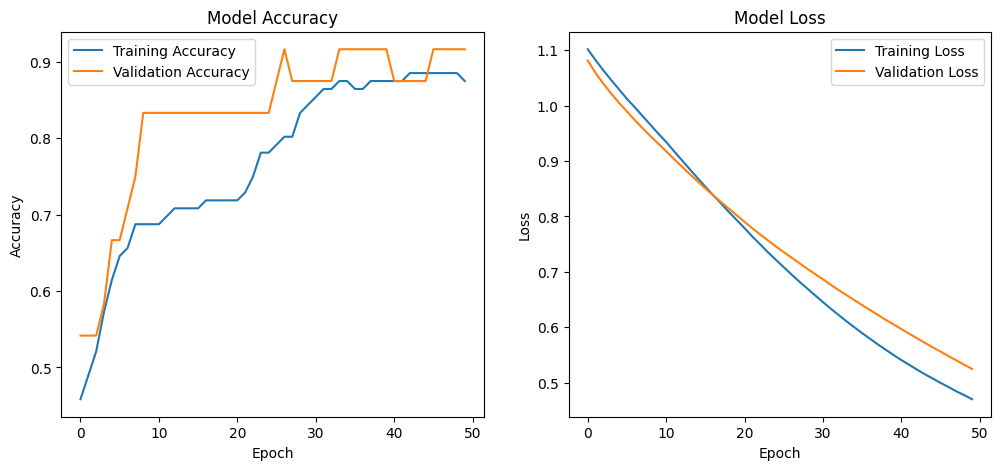

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


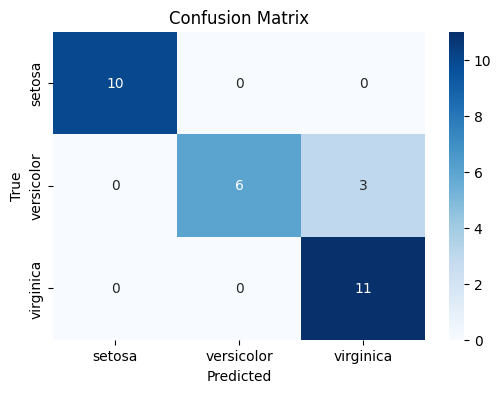


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.67      0.80         9
   virginica       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



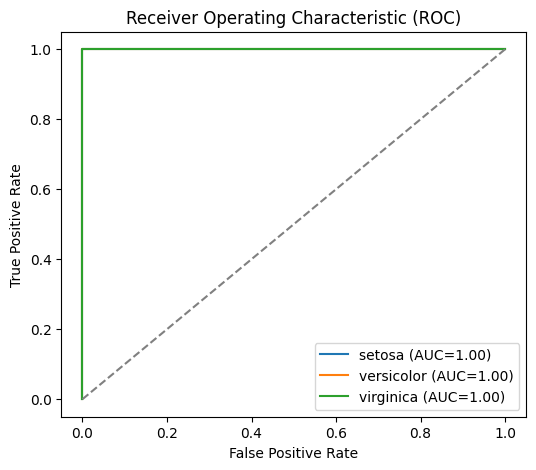

In [ ]:
# Full MLP Implementation and Deep Learning Workflow (Iris)

# Step 1: Dataset Loading
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encoding of target labels
y = keras.utils.to_categorical(y, 3)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Exploratory Data Analysis & Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Step 3: Building Sequential Neural Network Model
model = keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Step 4: Training the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Step 5: Visualizing Model Architecture
keras.utils.plot_model(model, show_shapes=True, to_file="model_architecture.png")

# Step 6: Plotting Accuracy and Loss Curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 7: Generating Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Step 8: Key Performance Metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=iris.target_names))

# ROC Curve and AUC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6,5))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'{iris.target_names[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()
